<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# AVOCADO CASE STUDY

<img src="https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg" align='CENTRE'><br/>

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Loading Data](#section3)<br>
  - 2.1 [Description of the Datasets](#section301)<br>
3. [Data Preprocessing](#section4)<br>
  - 3.1 [Data Preprocessing](#section401)<br>
4. [Exploratory Data Analysis](#section5)<br>
  - 4.1 [Data Visualization](#section501)<br>
5. [Regresson Models](#section6) <br> 
  - 5.1 [Linear Regression](#scton601)<br>
  - 5.2 [Decision Tree](#section602)<br>
  - 5.3 [Random Forest](#section603)<br>      
6. [conclusion](#section7)<br><br>      

<a id=section1></a>
1. Problem Statement

The goal is to predict the average price which is continuous in nature of the different type of avocado.The notebooks explores the basic use of Pandas and will cover the basic commands of (EDA) for analysis purpose.
In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…). The goal is to  build a model to predict the Average price of Avocados which is continuous in nature of the different type.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a id=section3></a>
2. Loading Data

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.shape

(18249, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


<a id=section301></a>
2.1 Description of the Datasets

Some relevant columns in the dataset:
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


In [5]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<a id= section501></a>
4.1 Data Visualization

Text(0.5,1,'Pie chart showing the proportion of each Type value')

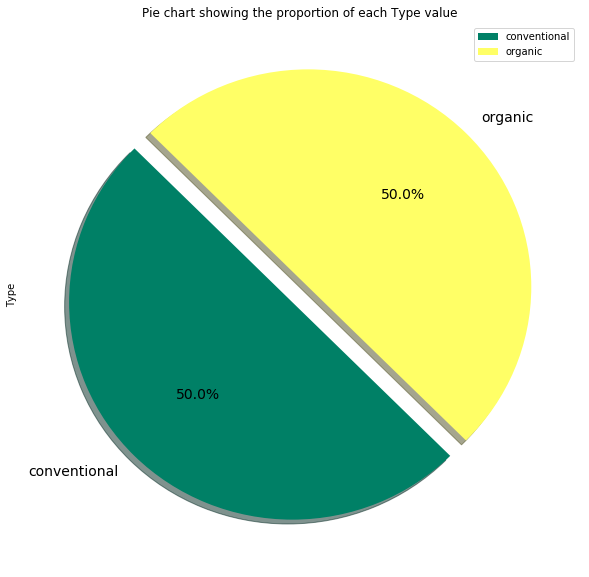

In [6]:
data['type'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10),shadow=True, startangle=135,legend=True, cmap='summer')

plt.ylabel('Type')
plt.title('Pie chart showing the proportion of each Type value')

Text(0.5,1,'year vs AveragePrice')

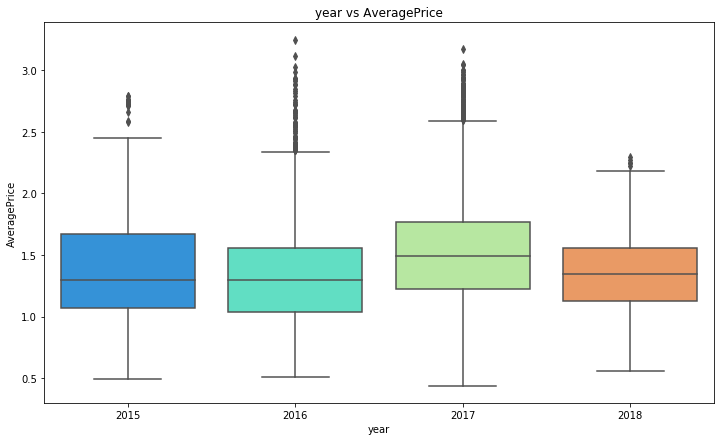

In [7]:
# Using seaborn's boxplot to plot a grouped boxplot of the Revenue and State columns.

plt.figure(figsize=(12,7))
sns.boxplot(data=data, x='year', y='AveragePrice', palette='rainbow')

plt.title('year vs AveragePrice')

Text(0.5,1,'type vs AveragePrice')

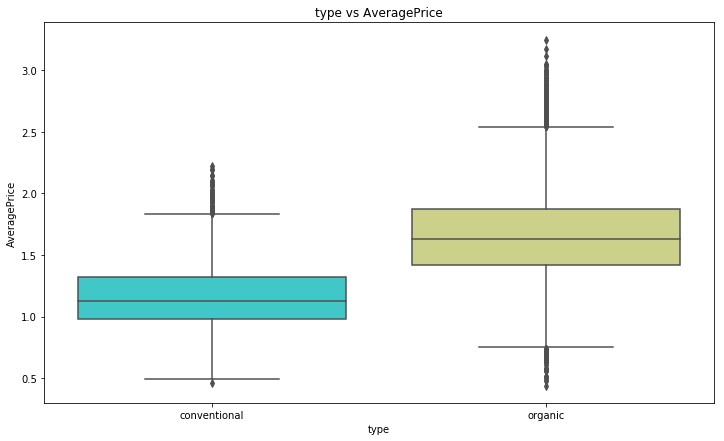

In [8]:
# Using seaborn's boxplot to plot a grouped boxplot of the Revenue and State columns.

plt.figure(figsize=(12,7))
sns.boxplot(data=data, x='type', y='AveragePrice', palette='rainbow')

plt.title('type vs AveragePrice')

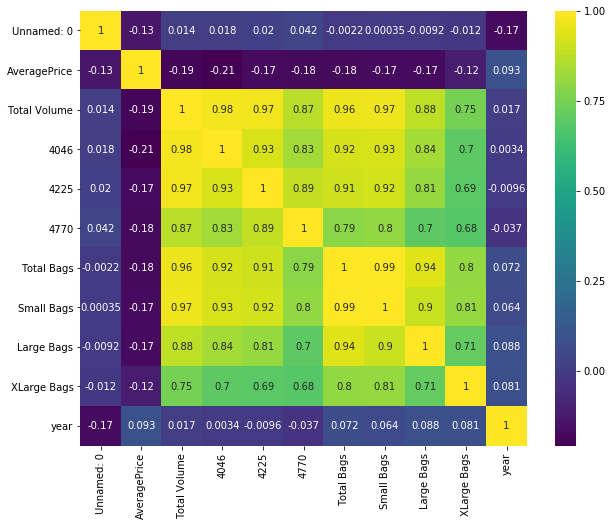

In [9]:
# Creating a correlation matrix using the corr function of the dataframe.
# Using seaborn's heatmap function to plot a heatmap of the correlatin matrix.

corr_mat = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

In [10]:
!pip install chart-studio

You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
# Making plotly specific imports. These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [12]:
import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

Text(0.5,1,'Bar Chart showing the total volume in each year')

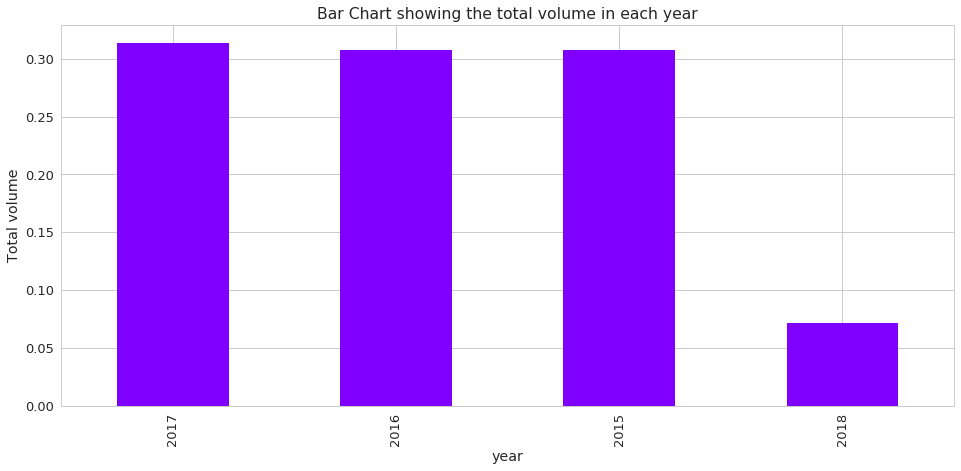

In [13]:
# Using pandas plot function to plot the bar chart for the Category column of the dataframe df_mcd.
# Using the kind='bar' to plot a bar chart. This method provides a lot of flexibility as different type of plots can be plotted
# just by changing the kind attribute.
# Here we are calculating the proportion by diving the each Category frequency with the number of rows (length) of the dataset.

(data['year'].value_counts() / len(data)).plot(kind='bar', figsize=(16,7), colormap='rainbow', fontsize=13)

plt.xlabel('year')
plt.ylabel('Total volume')
plt.title('Bar Chart showing the total volume in each year')

In [14]:
# convert the type of Date feature from obj to datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
# categorizing into several seasons

def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [16]:
# creating a new feature 'season' and assign the corresponding season for the Date using map function over our season_of_date function
data['season'] = data.Date.map(season_of_date)

In [17]:
# no of observations for each seasons
data.season.value_counts()

winter    5400
spring    4319
summer    4319
autumn    4211
Name: season, dtype: int64

Text(0.5,1,'Donut Plot showing the proportion of each season')

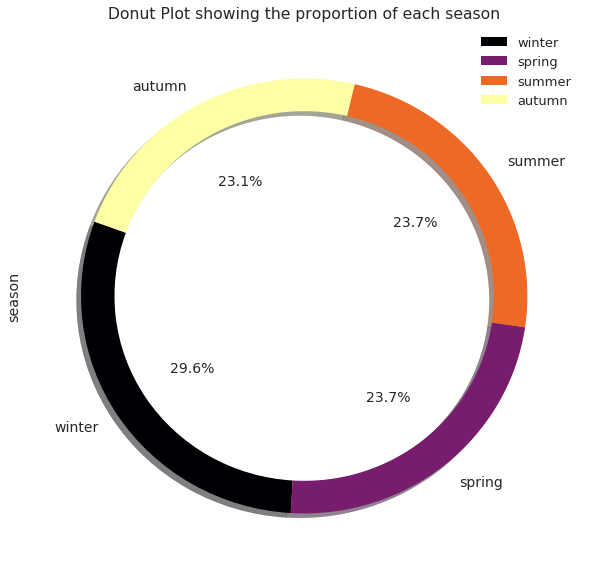

In [18]:
# Using pandas plot function to plot a donut plot of the Category column.
# Using kind='pie' to plot a donut plot, also setting explode values so that it takes a donut shape instead of a pie shape.

space = np.ones(11)/10
data['season'].value_counts().plot(kind='pie',fontsize=14,autopct='%3.1f%%', wedgeprops=dict(width=0.15),shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)
plt.ylabel('season')
plt.title('Donut Plot showing the proportion of each season')

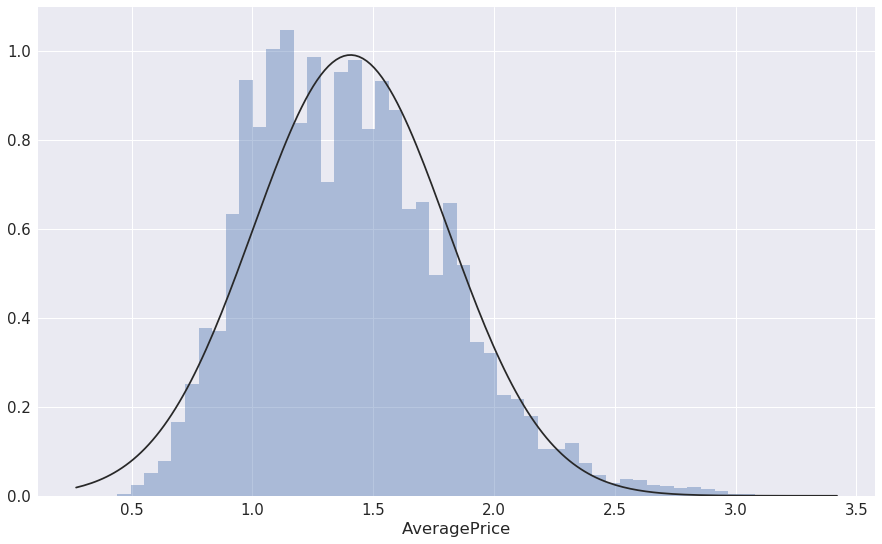

In [19]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=data.AveragePrice, kde=False, fit=norm)

<a id=section4></a>
3 Data Preprocessing

<a id=section401></a>
3.1 Data prprocessing

In [20]:
# droping date feature
data = data.drop(['Date'],axis = 1)

In [21]:
# converting categorical features of text data into model-understandable numerical data
label_cols = ['type','region','season']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data[label_cols] = data[label_cols].apply(lambda x : label.fit_transform(x))

In [22]:
import sklearn

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/nbuser/anaconda3_420/lib/python3.5/site-packages (0.22.2.post1)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
# spliting the label encoded features into distinct features inorder to prevent our model to think that columns have data with some kind of order or hierarchy
# column_tranformer allows us to combine several feature extraction or transformation methods into a single transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
scale_cols = data.drop(['AveragePrice','type','year','region','season'],axis=1)
col_trans = make_column_transformer(
            (OneHotEncoder(), data[label_cols].columns),
            (StandardScaler(), scale_cols.columns),
            remainder = 'passthrough')

Train Test Split

In [26]:
# splitting our dataset into train and test set such that 20% of observations are considered as test set
X = data.drop(['AveragePrice'],axis=1)
y = data.AveragePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<a id=section6></a>
5.Regression Models

<a id=section501></a>
5.1 Linear Regression

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
pipe = make_pipeline(col_trans,linreg)
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(copy=True,
               

In [28]:
y_pred_test = pipe.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.193671825374328
MSE for testing set: 0.06486743058329927
RMSE for testing set: 0.2546908529635473


<a id=section602></a>
5.2 Decision Tree 

In [30]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
pipe = make_pipeline(col_trans,dr)
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardsca...
      dtype='object'))],
                                   verbose=False)),
                

In [31]:
y_pred_test = pipe.predict(X_test)

In [32]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.11803013698630137
MSE for testing set: 0.03360791780821917
RMSE for testing set: 0.18332462411858144


<a id=section603></a>
5.3 Random Forest 

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
pipe = make_pipeline(col_trans,forest_model)
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardsca...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                       

In [34]:
y_pred_test = pipe.predict(X_test)

In [35]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.08789945205479449
MSE for testing set: 0.01613989980821917
RMSE for testing set: 0.12704290538325694


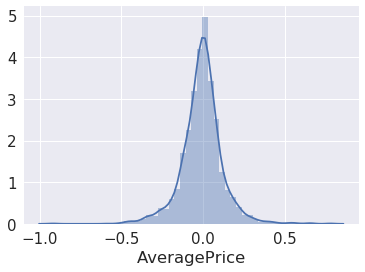

In [36]:
sns.distplot((y_test-y_pred_test),bins=50)

<a id=section7></a>
6. Conclusion

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.
Random Forest Regressor over performed Linear Regression, and Decision Tree Regressor with an RMSE of 0.1270.